# Global Power Plant Database

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/database_IND.csv')

In [111]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df.shape

(908, 25)

We have 908 rows and 25 columns in our dataset.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We have 12 object type features and 13 numeric type features.

In [114]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

As we do not have any value for the features other_fuel3,wepp_id,estimated_generation_gwh lets drop these fields.

In [115]:
df.drop(['other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [116]:
missing_features=['other_fuel1','other_fuel2','commissioning_year','owner','year_of_capacity_data','generation_data_source']

In [117]:
for col in missing_features:
    print(col)
    print('================================================')
    print(df[col].value_counts(),'\n')

other_fuel1
Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64 

other_fuel2
Oil    1
Name: other_fuel2, dtype: int64 

commissioning_year
2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64 

owner
Jk Cement ltd                           4
Acc Acc ltd                             4
Sterling Agro Industries ltd.           4
Government of India                     3
Powerica Limited                        3
                                       ..
Godawari Green Energy Limited (GGEL)    1
Torrent Power Limited                   1
Manikghar Cement co                     1
Janki Corp ltd                          1
Greta Energy ltd                        1
Name: owner, Length: 280, dtype: int64 

year_of_capacity_data
2018.0    520
Name: year_of_capacity_data, dtype: int64 

generation_data_source
Central Elec

Lets drop other_fuel2,year_of_capacity_data,generation_data_source columns as we have only one value to all the rows, so it will not help us to find any trend.

In [118]:
df.drop(['other_fuel2','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

In [119]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

Lets drop all unnessary columns which will not help us to find any trend for building the model.

In [120]:
df.drop(['country','name','gppd_idnr','owner','url'],axis=1,inplace=True)

In [121]:
df.columns

Index(['country_long', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [122]:
ct_columns=['country_long','other_fuel1','source']
for col in ct_columns:
    print(col)
    print('============================')
    print(df[col].value_counts(),'\n')

country_long
India    908
Name: country_long, dtype: int64 

other_fuel1
Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64 

source
Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Est vt Arind                                   1
Sinarmas Paper ltd                             1
Uttam Steels ltd                               1
Urja India edEnewables                         1
Lokmangal Lokmangal group                      1
Name: source, Length: 191, dtype: int64 



1. Country long has only one country, so lets drop the feature.
2. In other_fuel1 we have more than 50% data are missing and if we fill the missing value, it may not help us to build the model with better accuracy, so lets drop other_fuel1 feature.

In [123]:
df.drop(['country_long','other_fuel1'],axis=1,inplace=True)

In [124]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [125]:
df['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>]],
      dtype=object)

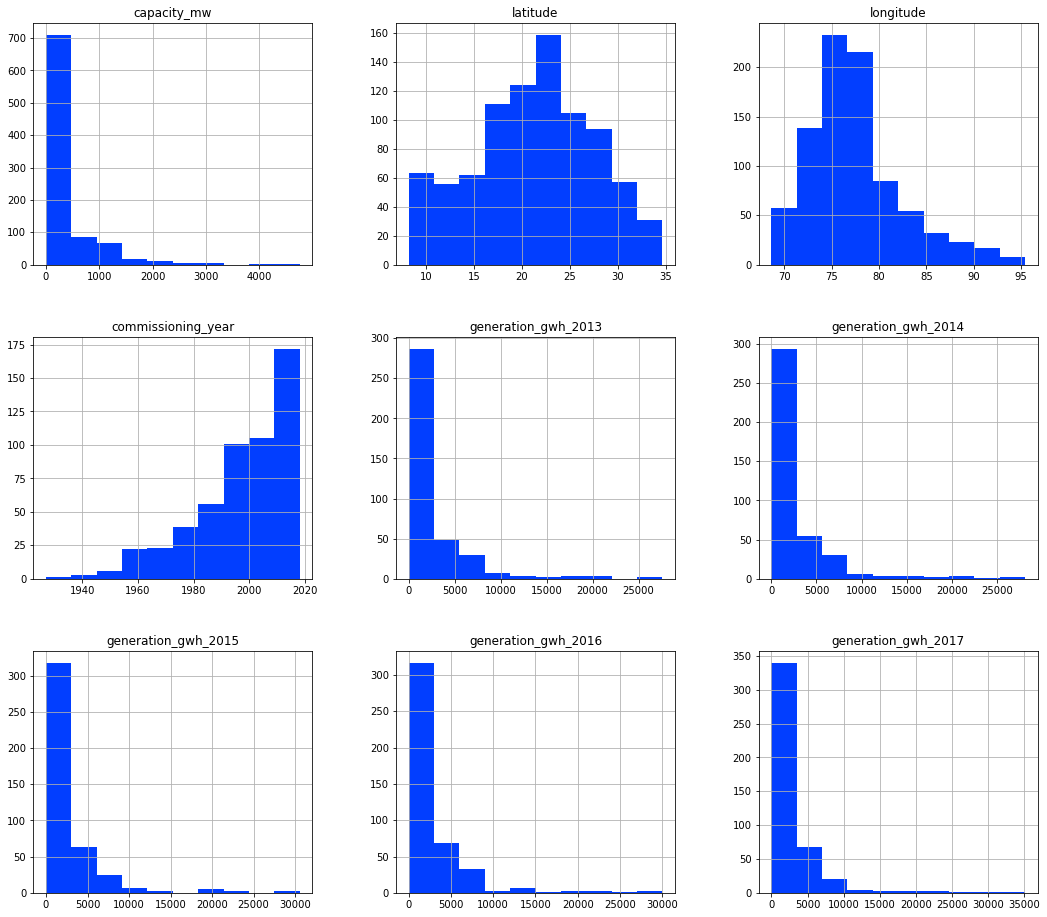

In [126]:
df.hist(figsize=(18,16))

Univariate Analysis

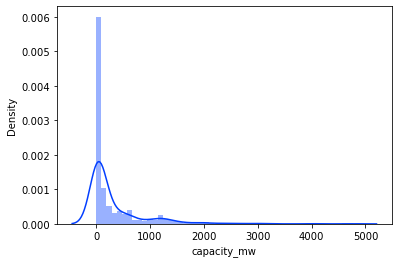

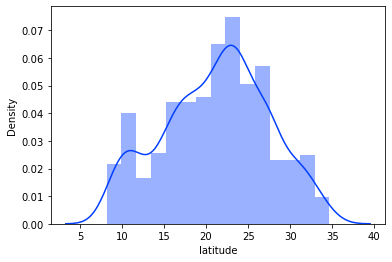

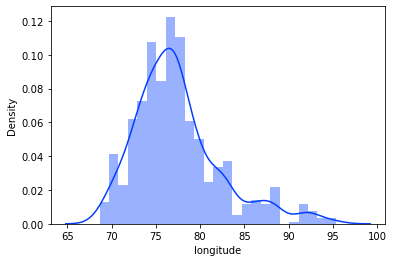

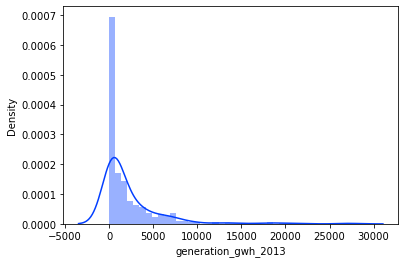

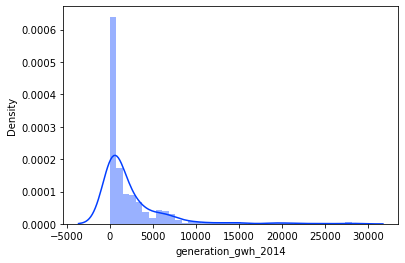

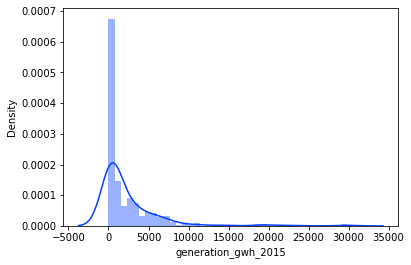

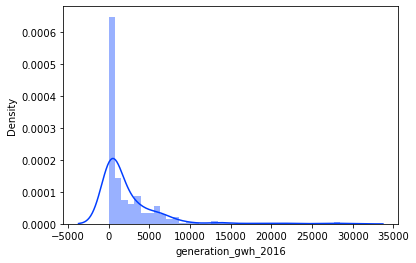

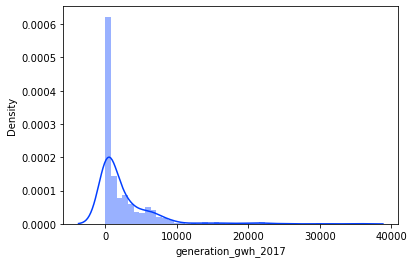

In [127]:
continous_features=['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for col in continous_features:
    sns.distplot(df[col])
    plt.show()

From above distribution plot we can see that the data is not normally distributed.

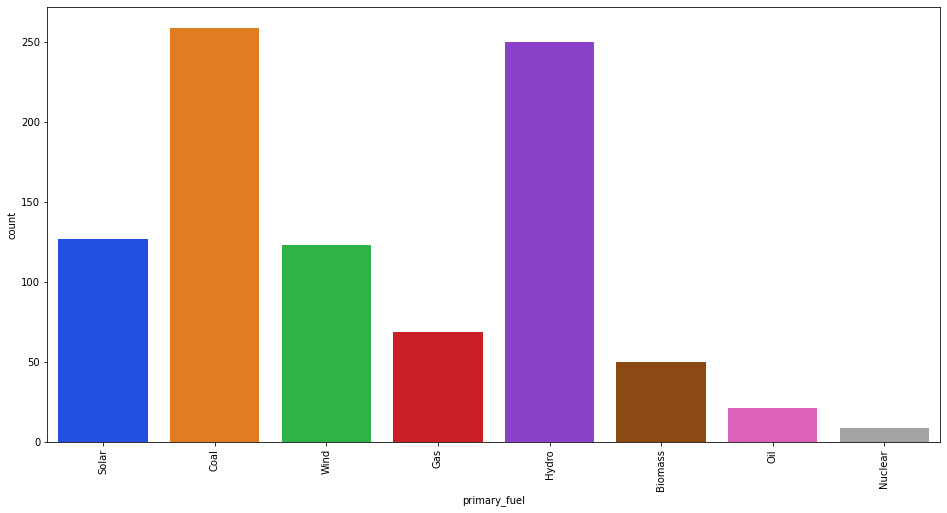

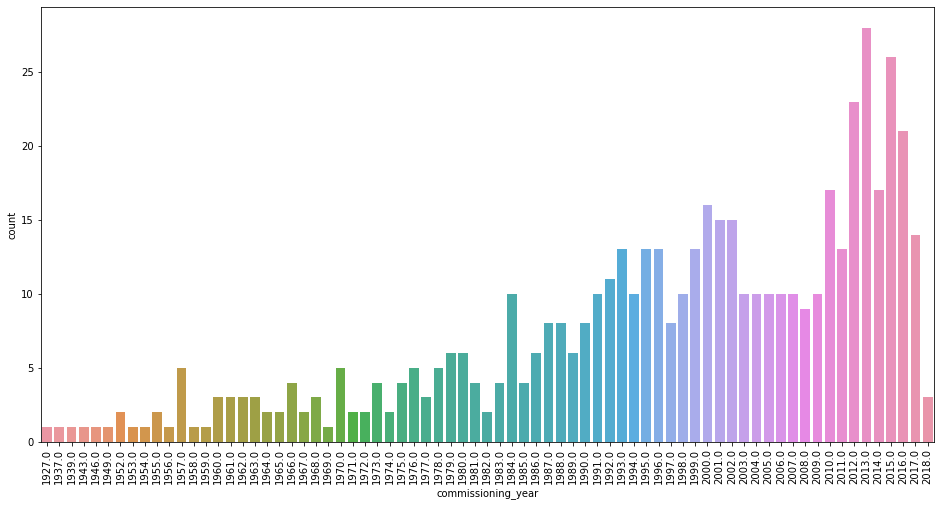

In [128]:
catg_features=['primary_fuel','commissioning_year']
for col in catg_features:
    plt.figure(figsize=(16,8))
    plt.xticks(rotation=90)
    sns.countplot(df[col])
    plt.show()

Observations from above plot:
1. We have 8 different type of primary fuels and more power plants are using coal and hydro as the primay fuel to generate the electricity and followed by solar and wind.
2. We have very less power plants which are using Nuclear and Oil as their primary fuel.
3. We have more plant operations in the year of 2013 and then 2015.
4. WRI(World Resources Institute) provided most of the geo location info for our data base.

BiVariate Analysis

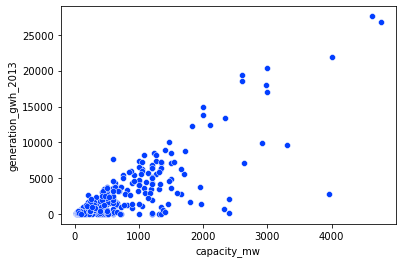

In [129]:
sns.scatterplot(df['capacity_mw'],df['generation_gwh_2013'])
plt.show()

The above plot shows that when the electricity generation per hour in GigaWatts increases ,then the electricity generation in megawatts also increases.

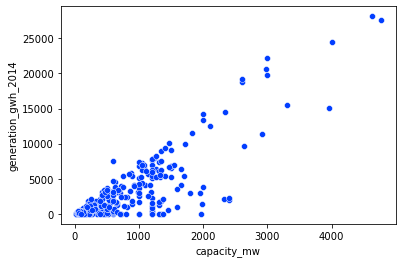

In [130]:
sns.scatterplot(df['capacity_mw'],df['generation_gwh_2014'])
plt.show()

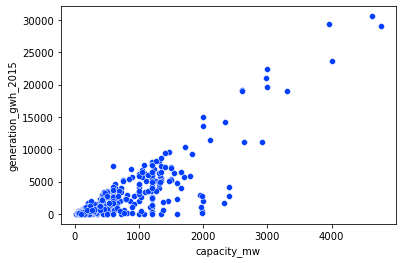

In [131]:

sns.scatterplot(df['capacity_mw'],df['generation_gwh_2015'])
plt.show()

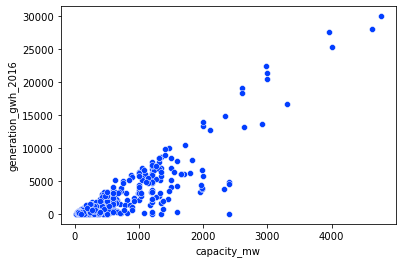

In [132]:
sns.scatterplot(df['capacity_mw'],df['generation_gwh_2016'])
plt.show()

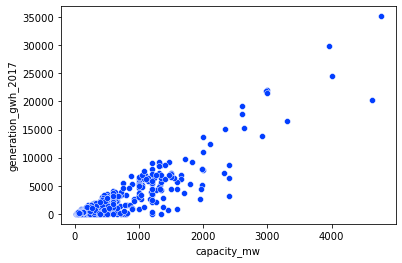

In [133]:
sns.scatterplot(df['capacity_mw'],df['generation_gwh_2017'])
plt.show()

Observations from above plot:
1. In all the years, majority of the plants generates electricity between 0 to 10000 gigawatts per hour.
2. Most of the plants generates 0 to 2000 megawatts electricity.

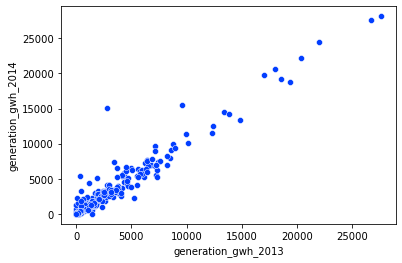

In [134]:
sns.scatterplot(df['generation_gwh_2013'],df['generation_gwh_2014'])
plt.show()

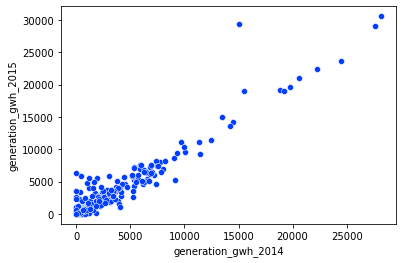

In [135]:
sns.scatterplot(df['generation_gwh_2014'],df['generation_gwh_2015'])
plt.show()

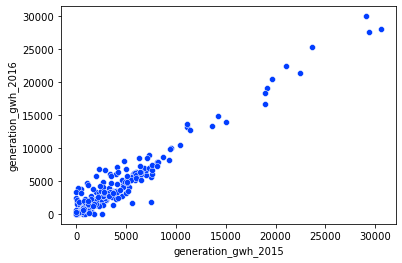

In [136]:
sns.scatterplot(df['generation_gwh_2015'],df['generation_gwh_2016'])
plt.show()

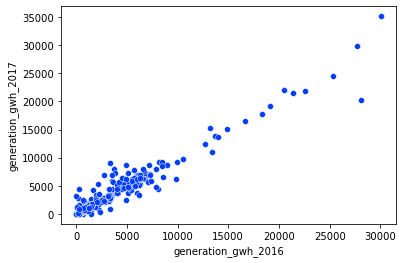

In [137]:
sns.scatterplot(df['generation_gwh_2016'],df['generation_gwh_2017'])
plt.show()

Observations from above scatter plot between the consecutive years:
1. When we compare the electricity generation between the previous year and the very next year, it always shows the linear relationship. It means, we could not see any major difference in the electricity generation capacity in the consecutive years.

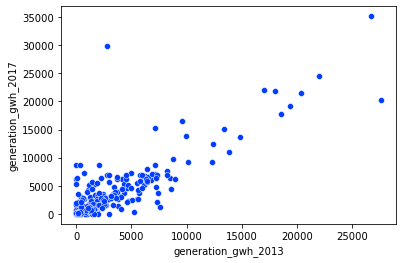

In [138]:
sns.scatterplot(df['generation_gwh_2013'],df['generation_gwh_2017'])
plt.show()

From the above plot, when we compare the electricity generation between 2013 and 2017, we could see some change in the trend. It shows that, the electricity generation in 2017 is little higher than 2013. 

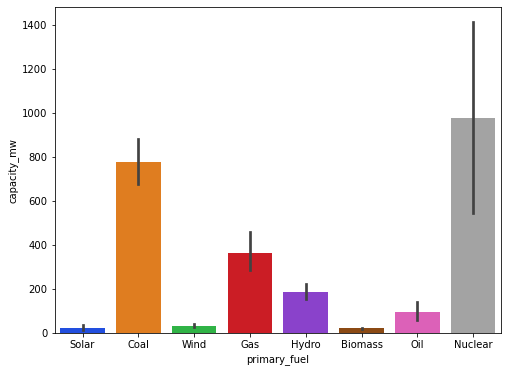

In [139]:
plt.figure(figsize=(8,6))
sns.barplot(df['primary_fuel'],df['capacity_mw'])
plt.show()

1. From the above plot we can observe that the plants which are using Nuclear as primary fuel are generating more electricity than other plants. 
2. The second highest capcity of electricity genration are from the plants which are using Coal as primary fuel.
3. Solar and Biomass and Wind plants are generating very less electricity than other plants.

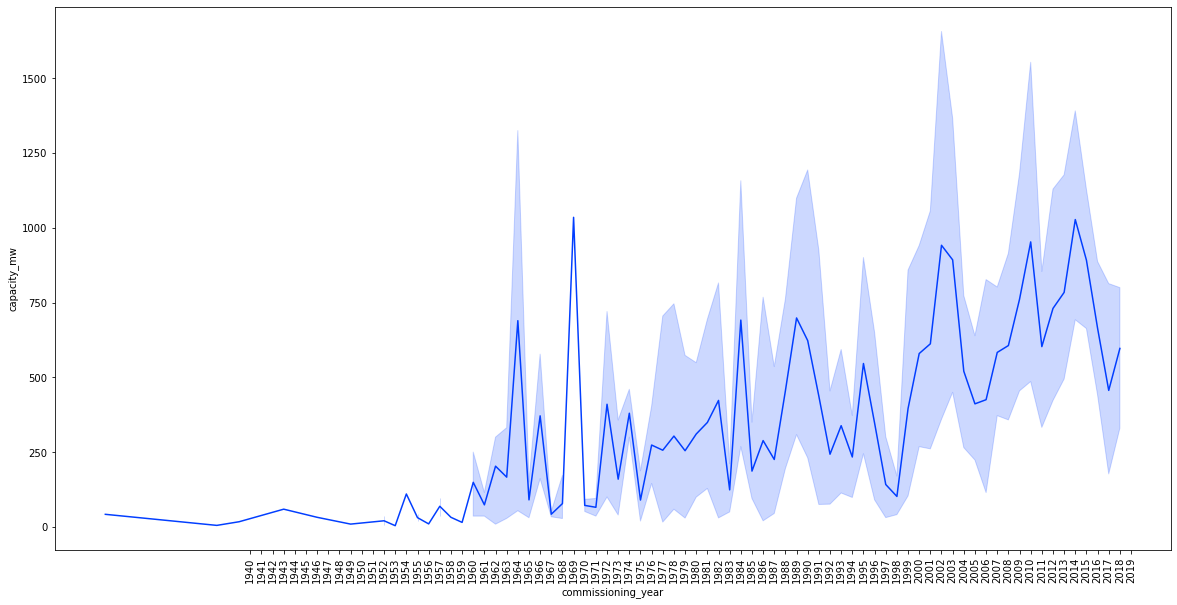

In [140]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xticks(np.arange(1940,2020,1))
sns.lineplot(df['commissioning_year'],df['capacity_mw'])
plt.show()

Observations from above plot:
1. Till the year of 1964, there was very less electricity generation form the power plants.
2. In the year of 1969 the power plants generated very high electricity than other years.
3. In recent years, in the year of 2014 electricity generation is high and followed by in the year of 2002.

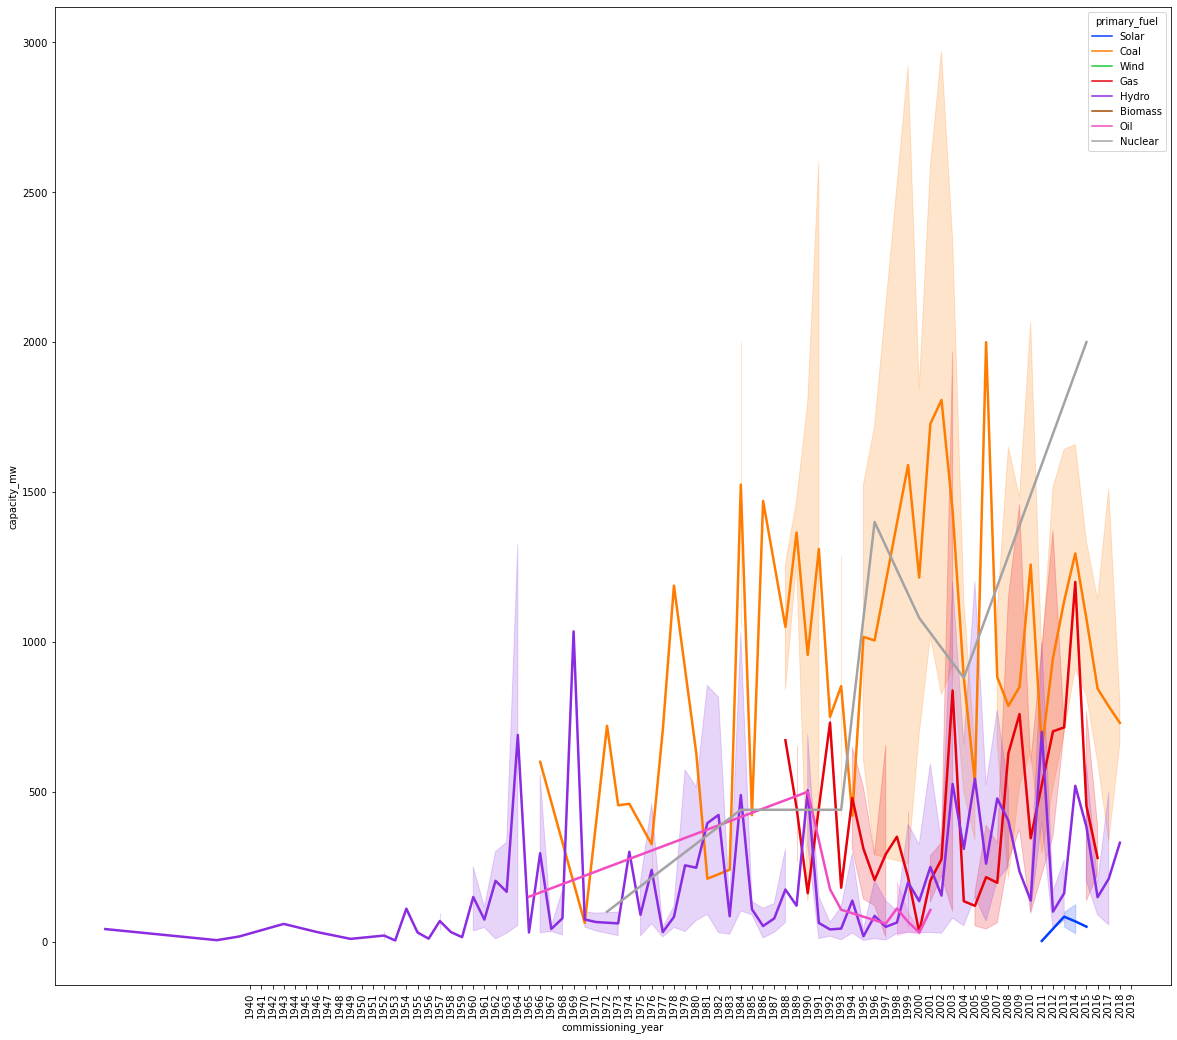

In [141]:
plt.figure(figsize=(20,18))
plt.xticks(rotation=90)
plt.xticks(np.arange(1940,2020,1))
sns.set_palette("bright")
sns.lineplot(df['commissioning_year'],df['capacity_mw'],hue=df['primary_fuel'],linewidth=2.5)
plt.show()

Observations from above plot:
1. In initial days, power plants were started using primary fuel as Hydro and we still continue using Hydro as primary fuel.
2. In the year of 1965 only power plants were started using Oil as the primary fuel and from the year 2001 power plants stopped using oil as their primary fuel.
3. In the year of 1966 we started using Coal as the primary fuel for plants and we still continue using Coal as fuel for power plants.
4. In the year of 1972 we started using Nuclear as the primary fuel for power plants and we still continue using Nuclear.
5. In the year of 1988, they started using Gas as the primary fuel for the plants and still using Gas.
6. From the year 2011, Solar energy used as primary fuel to generate electricity.
7. We can see that the plants using Nuclear enegery are producing more capcity of electricity than other plants.
8. Plants using Coal energy are producing second highest capacity of electrity power.
9. In the year of 1969, the plants generated more electricity using Hydro fuel.
10. We could not see trend for Wind and Biomass in this plot.


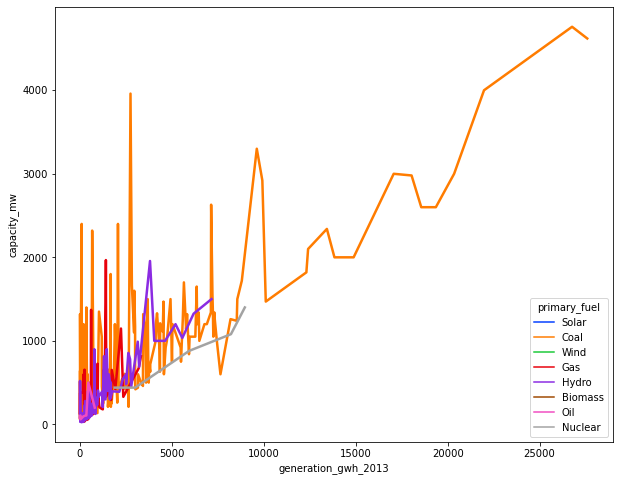

In [142]:
plt.figure(figsize=(10,8))
sns.set_palette("bright")
sns.lineplot(df['generation_gwh_2013'],df['capacity_mw'],hue=df['primary_fuel'],linewidth=2.5)
plt.show()

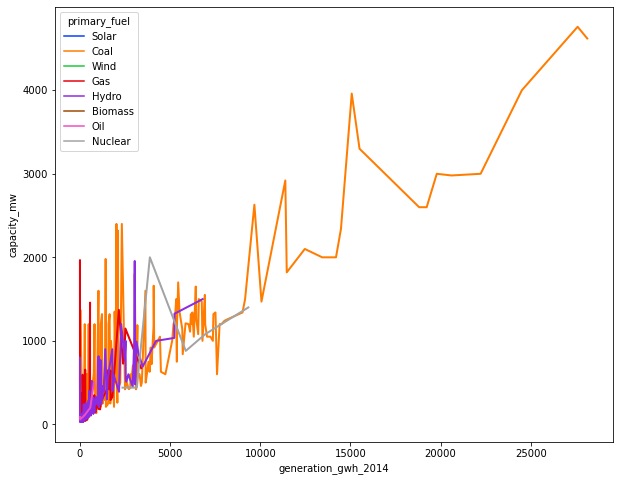

In [143]:
plt.figure(figsize=(10,8))
plt.plot(markersize=40)
sns.set_palette("bright")
sns.lineplot(df['generation_gwh_2014'],df['capacity_mw'],hue=df['primary_fuel'],linewidth=2)
plt.show()

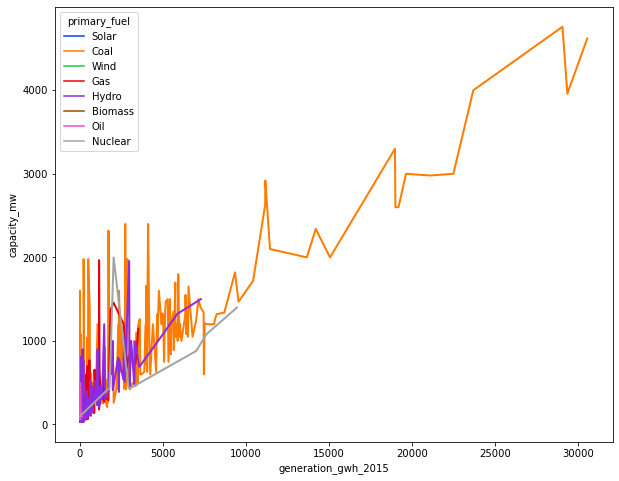

In [144]:
plt.figure(figsize=(10,8))
plt.plot(markersize=40)
sns.set_palette("bright")
sns.lineplot(df['generation_gwh_2015'],df['capacity_mw'],hue=df['primary_fuel'],linewidth=2)
plt.show()

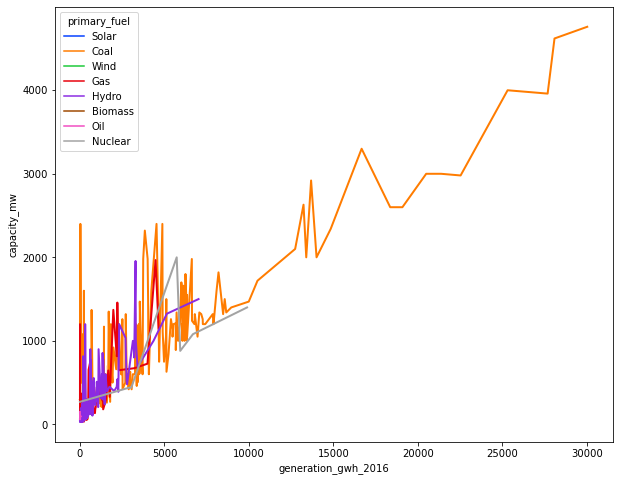

In [145]:
plt.figure(figsize=(10,8))
plt.plot(markersize=40)
sns.set_palette("bright")
sns.lineplot(df['generation_gwh_2016'],df['capacity_mw'],hue=df['primary_fuel'],linewidth=2)
plt.show()

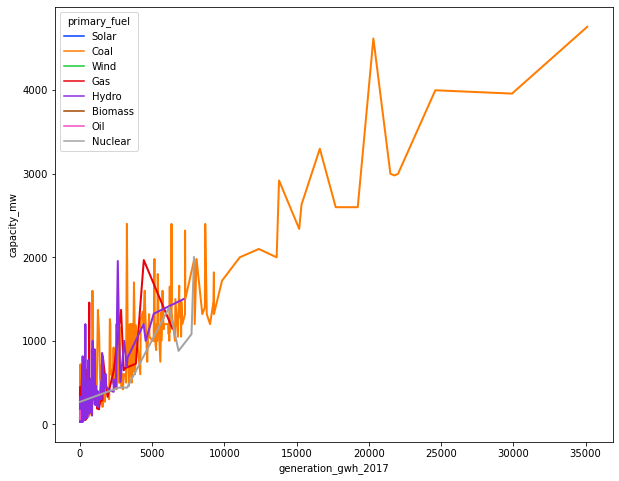

In [146]:
plt.figure(figsize=(10,8))
plt.plot(markersize=40)
sns.set_palette("bright")
sns.lineplot(df['generation_gwh_2017'],df['capacity_mw'],hue=df['primary_fuel'],linewidth=2)
plt.show()

Observations from above plots:
1. In all the years, the plants which are using Coal are producing high electricity than other plants and followed by Nuclear and Gas.

### Filling missing values

In [147]:
df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [148]:
df.longitude.value_counts()

71.6917    4
71.6918    3
75.8988    3
72.8983    3
81.2875    3
          ..
80.1264    1
76.1137    1
74.6447    1
86.0970    1
79.5748    1
Name: longitude, Length: 828, dtype: int64

In [149]:
df.latitude.value_counts()

24.1917    3
19.0004    3
16.5697    2
23.4639    2
13.2450    2
          ..
20.9099    1
17.2387    1
23.5594    1
27.3426    1
16.5973    1
Name: latitude, Length: 837, dtype: int64

In [150]:
from sklearn.impute import SimpleImputer

In [151]:
mean_features=['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for col in mean_features:
    df[col]=SimpleImputer(strategy='mean').fit_transform(df[[col]])


In [152]:
mode_featues=['commissioning_year','geolocation_source']
for col in mode_featues:
    df[col]=SimpleImputer(strategy='most_frequent').fit_transform(df[[col]])

In [153]:
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

#### Encoding the object features to numbers

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [156]:
enc_features=['primary_fuel','source','geolocation_source']
for col in enc_features:
    df[col]=LabelEncoder().fit_transform(df[col])

### Checking MultiColinearity

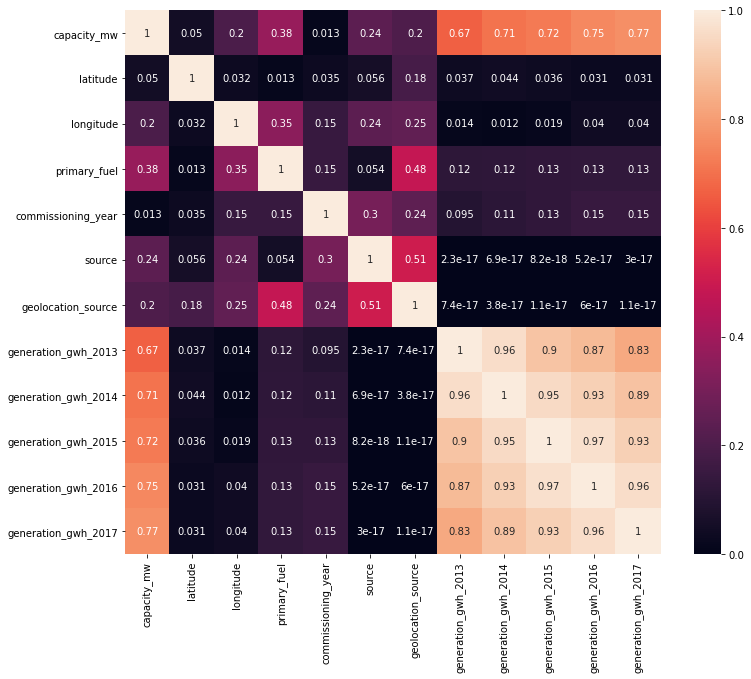

In [157]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

From the above heatmap we could see that there is strong correlation between the features generation_gwh_2013 and generation_gwh_2014 and many other features. Lets handle this using VIF factor.

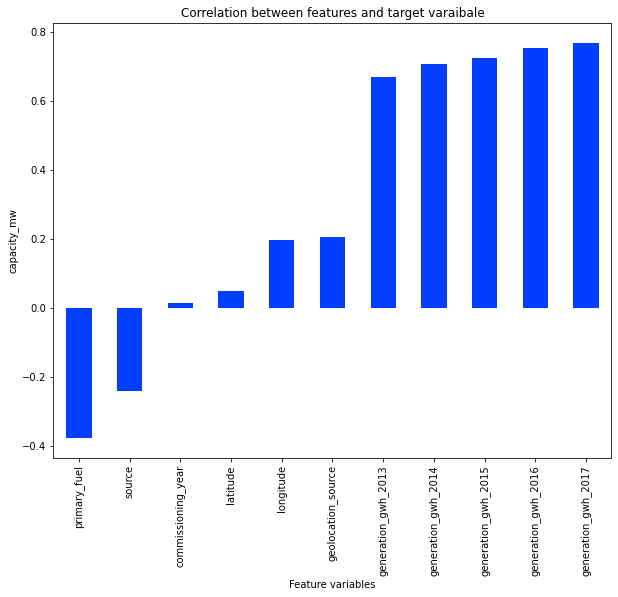

In [158]:
plt.figure(figsize=(10,8))
df.corr()['capacity_mw'].sort_values().drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('capacity_mw')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

The feature commisioning year is very less correlated with the target variable. So lets drop commissioning_year.

### Checking Outliers

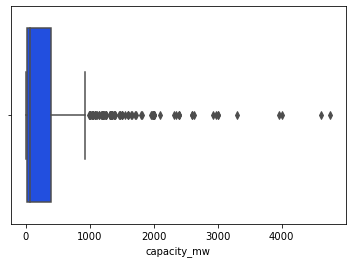

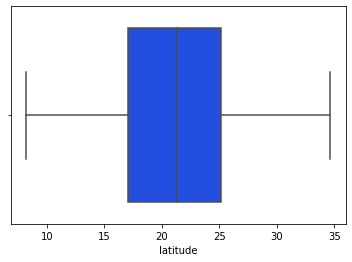

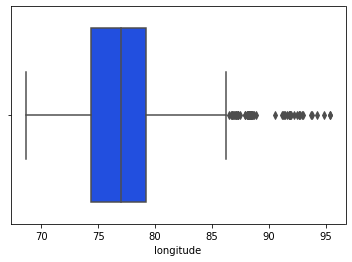

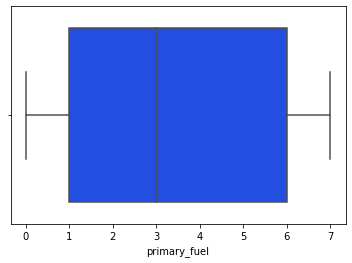

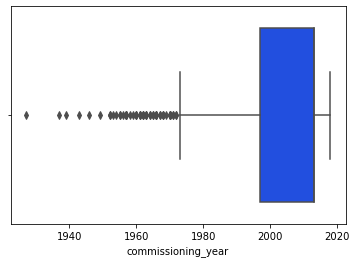

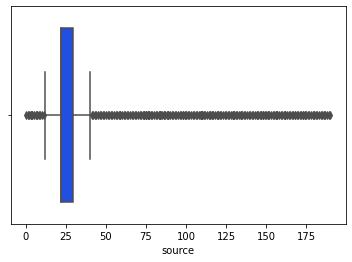

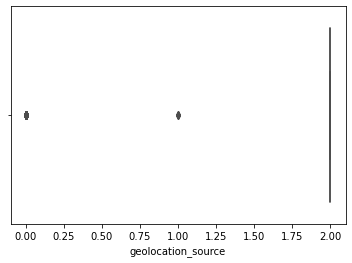

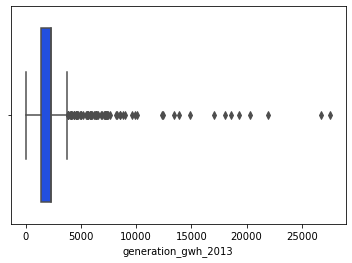

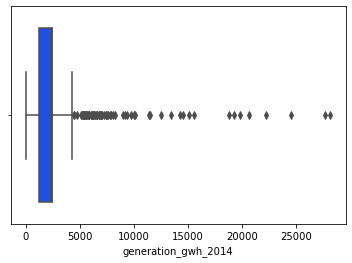

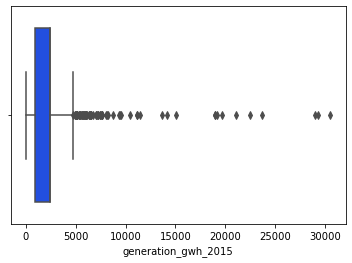

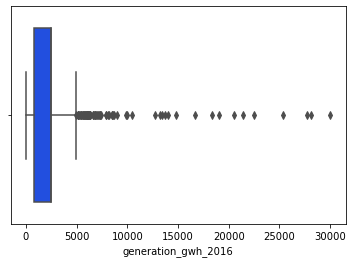

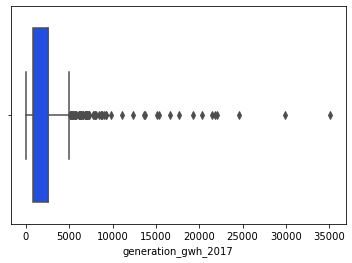

In [159]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

We have outliers in continous features capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,
generation_gwh_2015,generation_gwh_2016,generation_gwh_2017.


As we consider target value as capacity_mw, lets not clean capacity_mw data.

In [160]:
outlier_features=['longitude','generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [161]:
from scipy.stats import zscore

In [162]:
score=zscore(df[outlier_features])
filtering=(score<3).all(axis=1)
new_df=df[filtering]
print(df.shape,new_df.shape)

(908, 12) (871, 12)


We removed few rows as part of outlier removal.

##### Data loss

In [163]:
data_loss=((df.shape[0]-new_df.shape[0])/df.shape[0])*100
data_loss

4.074889867841409

We lost 4% of data as part of outlier removal process.

### Checking Data skewness

In [164]:
new_df.skew().sort_values()

geolocation_source    -2.105485
commissioning_year    -1.829596
latitude              -0.102142
primary_fuel           0.427117
longitude              0.858318
generation_gwh_2017    1.272489
generation_gwh_2015    1.323894
generation_gwh_2016    1.336249
generation_gwh_2014    1.444235
generation_gwh_2013    1.528166
source                 1.771230
capacity_mw            2.157963
dtype: float64

In [165]:
skewed_features=['longitude','generation_gwh_2017','generation_gwh_2015','generation_gwh_2016','generation_gwh_2014','generation_gwh_2013','capacity_mw']

In [166]:
from sklearn.preprocessing import PowerTransformer

In [167]:
new_df[skewed_features]=PowerTransformer().fit_transform(new_df[skewed_features])
print(new_df.skew().sort_values())

geolocation_source    -2.105485
commissioning_year    -1.829596
generation_gwh_2017   -0.342359
generation_gwh_2016   -0.326904
generation_gwh_2015   -0.324311
generation_gwh_2014   -0.259853
generation_gwh_2013   -0.183815
latitude              -0.102142
longitude             -0.001595
capacity_mw            0.016471
primary_fuel           0.427117
source                 1.771230
dtype: float64


we removed skewness from all the continous and independent variables.Now our data is ready to build the model.

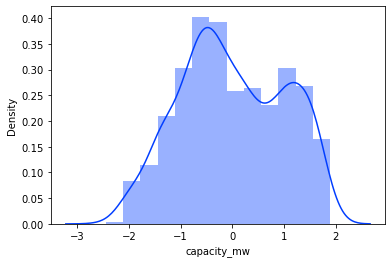

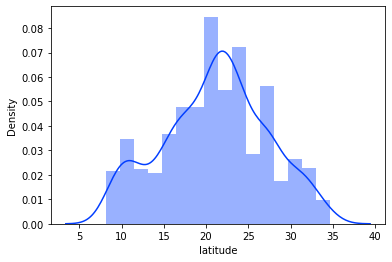

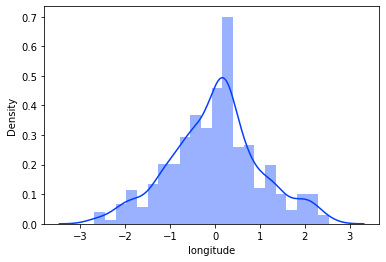

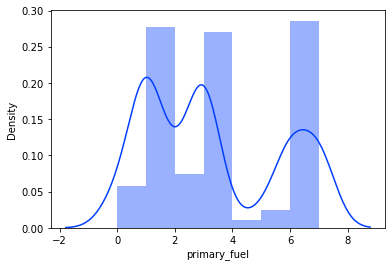

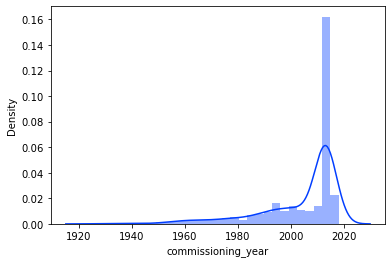

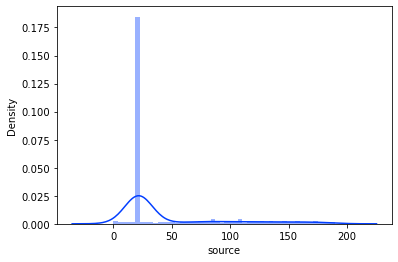

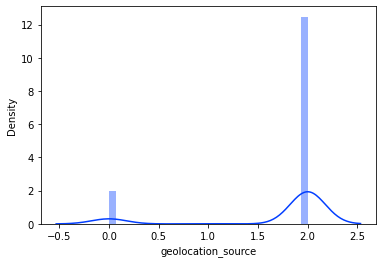

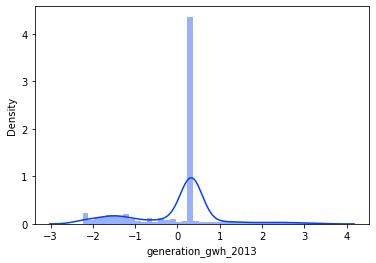

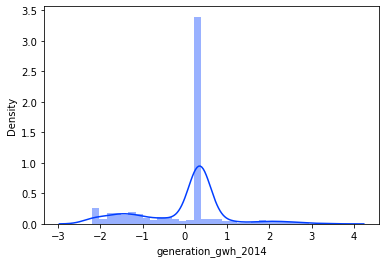

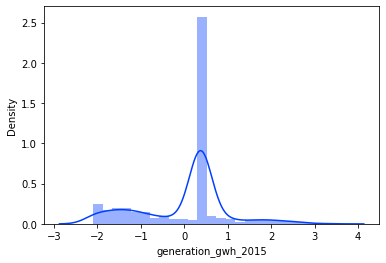

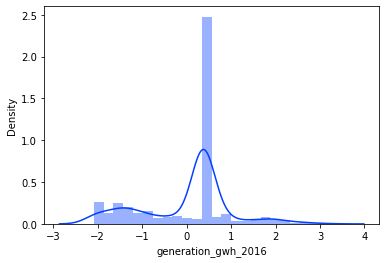

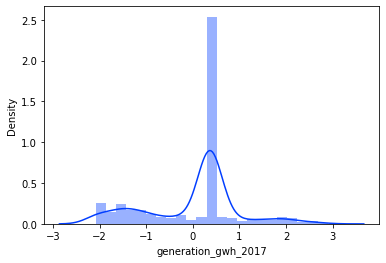

In [168]:
for col in new_df.columns:
    sns.distplot(new_df[col])
    plt.show()

## Building Regression model to predict the capacity_mw

In [169]:
new_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
X=new_df.drop(['capacity_mw','commissioning_year','source'],axis=1)
y=new_df['capacity_mw']

In [172]:
print(X.shape,y.shape)

(871, 9) (871,)


### Removing MultiColinearity using VIF

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
7,10.470301,generation_gwh_2016
5,8.531925,generation_gwh_2014
6,7.860096,generation_gwh_2015
4,6.605108,generation_gwh_2013
0,6.252044,latitude
8,5.497940,generation_gwh_2017
3,4.539878,geolocation_source
2,2.958875,primary_fuel
1,1.243880,longitude


The above metrics shows that we have multicolinearity problem in the feature. But we do not know which feature is highly important. So lets apply PCA to reduce the dimention as well as to remove the multicoliearity.

In [174]:
X=X.drop(['generation_gwh_2016'],axis=1)

In [175]:
X_sc=StandardScaler().fit_transform(X)

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

Finding best Random state to split the train test sets

In [177]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=r2_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)

Best Accuracy:  0.456447282672236 Best RS:  78


Splitting the train and test set using the best random state

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=78)

In [179]:
lr=LinearRegression()
ls=Lasso()
rdg=Ridge()
rf_reg=RandomForestRegressor()
gb_reg=GradientBoostingRegressor()
svr_reg=SVR()
knn=KNeighborsRegressor()

In [180]:
models=[lr,ls,rdg,rf_reg,gb_reg,svr_reg,knn]

In [181]:
for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Train Accuracy: ",m.score(X_train,y_train))
    print("Test Accuracy: ",r2_score(y_test,y_pred))
    print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
    print("Root Mean Sqaured Error: ",np.sqrt(mean_squared_error(y_test,y_pred)),'\n')

Metrics for  LinearRegression()
Train Accuracy:  0.3294194208363884
Test Accuracy:  0.456447282672236
Mean Absolute Error:  0.6750874191772931
Mean Squared Error:  0.6256187386591562
Root Mean Sqaured Error:  0.7909606429267869 

Metrics for  Lasso()
Train Accuracy:  0.0
Test Accuracy:  -2.7979200893923917e-06
Mean Absolute Error:  0.9051954560938366
Mean Squared Error:  1.1509840152508009
Root Mean Sqaured Error:  1.0728392308499912 

Metrics for  Ridge()
Train Accuracy:  0.32941871556256863
Test Accuracy:  0.45629438019547397
Mean Absolute Error:  0.6752404085763914
Mean Squared Error:  0.6257947264734016
Root Mean Sqaured Error:  0.7910718845170782 

Metrics for  RandomForestRegressor()
Train Accuracy:  0.9610884278232316
Test Accuracy:  0.8274316168249265
Mean Absolute Error:  0.3277283279285283
Mean Squared Error:  0.19862289484119716
Root Mean Sqaured Error:  0.4456712856368437 

Metrics for  GradientBoostingRegressor()
Train Accuracy:  0.876507480493255
Test Accuracy:  0.8424043

In [182]:
for m in models:
    print("Cross validation score for ",m,cross_val_score(m,X_sc,y,cv=5).mean())

Cross validation score for  LinearRegression() 0.3482306951870093
Cross validation score for  Lasso() -0.0040964567043755284
Cross validation score for  Ridge() 0.348332758420819
Cross validation score for  RandomForestRegressor() 0.785416731202741
Cross validation score for  GradientBoostingRegressor() 0.7892825085643353
Cross validation score for  SVR() 0.6523924725442894
Cross validation score for  KNeighborsRegressor() 0.6599752854376918


Based on the base model and RMSE score, GradientBoostingRegressor works well for our dataset.

### Final model - GradientBoostRegressor

##### Hyper Parameter tuning

In [183]:
from sklearn.model_selection import GridSearchCV
param={'learning_rate':[0.01,0.1,1],'max_depth':[5,7,9,11],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[150,180,210]}
grd_srch=GridSearchCV(GradientBoostingRegressor(),param_grid=param,cv=5,n_jobs=-1)
grd_srch.fit(X_train,y_train)
print(grd_srch.best_estimator_)

GradientBoostingRegressor(max_depth=5, max_features='log2', n_estimators=150)


In [184]:
m_acc=0
b_rs=0
for i in range(1,100):
    final_model=GradientBoostingRegressor(max_depth=5,max_features='log2', n_estimators=150,random_state=i)
    final_model.fit(X_train,y_train)
    y_pred=final_model.predict(X_test)
    acc=r2_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)

Best Accuracy:  0.8597223364010632 Best RS:  78


In [186]:
final_model_reg=GradientBoostingRegressor(max_depth=5, max_features='log2',n_estimators=150,random_state=78)
final_model_reg.fit(X_train,y_train)
y_pred=final_model_reg.predict(X_test)
print("Train Accuracy: ",final_model_reg.score(X_train,y_train))
print("Test Accuracy: ",r2_score(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Root Mean Sqaured Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Train Accuracy:  0.9619282376365969
Test Accuracy:  0.8597223364010632
Mean Absolute Error:  0.3032983625114816
Mean Squared Error:  0.1614568967556104
Root Mean Sqaured Error:  0.4018169941100182


#### We able to build a final model with Accuracy of 86% and RMSE value with 0.4

#### Saving final model

In [187]:
import pickle

In [188]:
pickle.dump(final_model_reg,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/GlobalPowerPlantReg.pkl','wb'))

In [189]:
model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/GlobalPowerPlantReg.pkl','rb'))

In [190]:
prediction=model.predict(X_test)
result=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result.head()

,Actual,Predicted
6,-0.038035,-0.389258
780,-1.774330,-0.767499
858,-0.014993,-0.276946
523,0.045637,0.309042
63,0.181663,0.293241


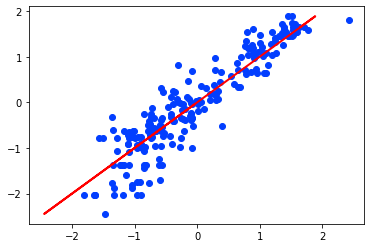

In [191]:
plt.scatter(prediction,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

The above plot shows that best fit line created by our model.

## Building Classification model to predict the Primary_fuel

In [83]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

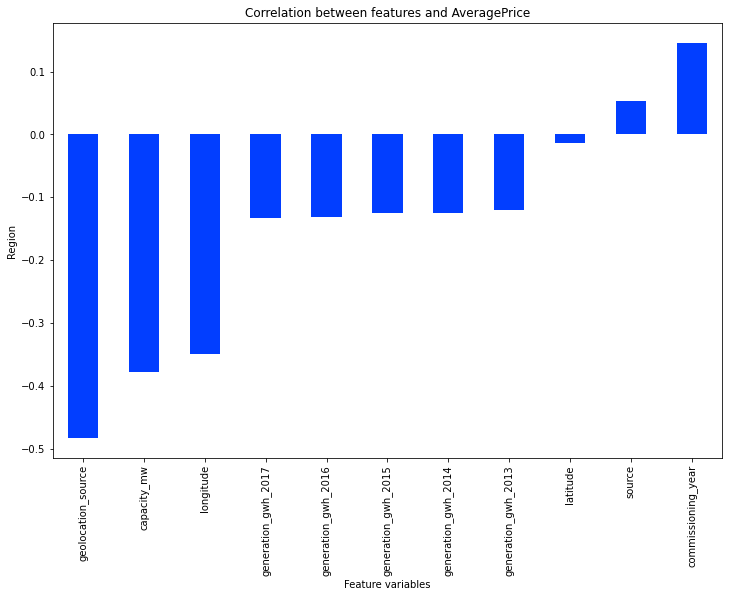

In [84]:
plt.figure(figsize=(12,8))
df.corr()['primary_fuel'].sort_values().drop(['primary_fuel']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.title('Correlation between features and AveragePrice')
plt.show()

In [85]:
X=new_df.drop(['primary_fuel'],axis=1)
y=new_df['primary_fuel']

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
3,33.424462,commissioning_year
1,13.848938,latitude
5,11.958122,geolocation_source
9,10.476890,generation_gwh_2016
7,8.549172,generation_gwh_2014
8,7.865348,generation_gwh_2015
6,6.625148,generation_gwh_2013
10,5.529849,generation_gwh_2017
4,2.840194,source
0,1.482240,capacity_mw


In [87]:
X=X.drop(['commissioning_year'],axis=1)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
8,10.469126,generation_gwh_2016
6,8.530977,generation_gwh_2014
7,7.864785,generation_gwh_2015
5,6.610139,generation_gwh_2013
1,6.150139,latitude
9,5.516776,generation_gwh_2017
4,4.923859,geolocation_source
3,2.372628,source
0,1.383354,capacity_mw
2,1.195555,longitude


In [89]:
X=X.drop(['generation_gwh_2016'],axis=1)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
6,8.516863,generation_gwh_2014
5,6.576920,generation_gwh_2013
1,6.138720,latitude
7,5.310063,generation_gwh_2015
4,4.912187,geolocation_source
8,2.986086,generation_gwh_2017
3,2.372608,source
0,1.383354,capacity_mw
2,1.187165,longitude


In [91]:
X.skew().sort_values()

geolocation_source    -2.105485
generation_gwh_2017   -0.342359
generation_gwh_2015   -0.324311
generation_gwh_2014   -0.259853
generation_gwh_2013   -0.183815
latitude              -0.102142
longitude             -0.001595
capacity_mw            0.016471
source                 1.771230
dtype: float64

In [92]:
y.value_counts()

1    241
3    236
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [93]:
X_sc=StandardScaler().fit_transform(X)

In [94]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)

Best Accuracy:  0.7889908256880734 Best RS:  14


In [95]:
 X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=14)

### Appliying SMOTE to balance the classifiers

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (653, 9) (653,)
Training set size after applying SMOTE: (1456, 9) (1456,)


In [98]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
gb_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ab_clf=AdaBoostClassifier()
knn_clf=KNeighborsClassifier()
svc=SVC()

In [99]:
models=[knn_clf,rf_clf,gb_clf,dt_clf,ab_clf,svc]

In [100]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classsification Report: \n",classification_report(y_test,y_pred),'\n')
   
    

Metrics for  KNeighborsClassifier()
Accuracy score:  0.7155963302752294
Confusion Matrix: 
 [[ 7  4  0  0  0  0  0  0]
 [ 1 37  1  3 10  4  0  3]
 [ 0  2  4  6  0  1  0  0]
 [ 2  4  3 40  2  2  0  7]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  1  0  3  0  0]
 [ 1  0  0  0  0  1 38  0]
 [ 3  0  0  0  0  0  0 26]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.79      0.63      0.70        59
           2       0.44      0.31      0.36        13
           3       0.80      0.67      0.73        60
           4       0.08      1.00      0.14         1
           5       0.27      0.60      0.37         5
           6       1.00      0.95      0.97        40
           7       0.72      0.90      0.80        29

    accuracy                           0.72       218
   macro avg       0.58      0.71      0.58       218
weighted avg       0.77      0.72      0.73       218
 

Metrics for 

In [101]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(k_neighbors=3,random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  KNeighborsClassifier()
Mean Accuracy:  0.6808078817733991
For Model  RandomForestClassifier()
Mean Accuracy:  0.8082692939244664
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.8059835796387521
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.7727027914614122
For Model  AdaBoostClassifier()
Mean Accuracy:  0.28023645320197044
For Model  SVC()
Mean Accuracy:  0.6566962233169129


Based on the cross validation score, GradientBoostingClassifier works well for our dataset

### Final Model - GradientBoostingClassifier

In [102]:
from sklearn.model_selection import GridSearchCV

##### Hyper paramter tuning

In [103]:
param={'learning_rate':[0.1,0.5,1],
       'max_depth':[3,5,8,9],
       'max_features':['auto', 'sqrt', 'log2'],
      'n_estimators':[100,130]}
grd_srch=GridSearchCV(GradientBoostingClassifier(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features='log2',
                           n_estimators=130)
0.9203596478840088


##### Finding best random state

In [105]:
m_acc=0
b_rs=0
for i in range(1,20):
    final_model=GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features='log2',n_estimators=130,random_state=i)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)
final_model=GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features='log2',n_estimators=130,random_state=b_rs)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Accuracy:  0.9770114942528736 Best RS:  1
0.9770114942528736
[[ 4  0  0  0  0  0  0  0]
 [ 0 43  0  1  0  1  0  0]
 [ 0  0 14  0  0  0  0  0]
 [ 0  0  2 42  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.96      0.98        45
           2       0.88      1.00      0.93        14
           3       0.98      0.95      0.97        44
           4       1.00      1.00      1.00         1
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        39

    accuracy                           0.98       174
   macro avg       0.96      0.99      0.97       174
weighted avg       0.98      0.98      0.98       174



In [107]:
final_model_clf=GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features='log2',n_estimators=130,random_state=1)
final_model_clf.fit(X_train_res,y_train_res)
y_pred=final_model_clf.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Test Accuracy score:  0.9770114942528736
Confusion Matrix: 
 [[ 4  0  0  0  0  0  0  0]
 [ 0 43  0  1  0  1  0  0]
 [ 0  0 14  0  0  0  0  0]
 [ 0  0  2 42  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 39]]
Classifiction Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.96      0.98        45
           2       0.88      1.00      0.93        14
           3       0.98      0.95      0.97        44
           4       1.00      1.00      1.00         1
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        39

    accuracy                           0.98       174
   macro avg       0.96      0.99      0.97       174
weighted avg       0.98      0.98      0.98       174



##### We able to build a final model with 98% of accuracy score.

### Model Saving

In [ ]:
import pickle

In [ ]:
pickle.dump(final_model_clf,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/GlobalPowerPlantClf.pkl','wb'))

In [ ]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/GlobalPowerPlantClf.pkl','rb'))

In [ ]:
prediction=final_model.predict(X_test)
result_table=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result_table